# CPE313 Prelims Skills Exam

**Name:** Vhan Randolp S. Peña

**Section:** CPE32S8

**Professor:** Engr. Roman Richard

# NIH Chest X-rays

Over 112,000 Chest X-ray images from more than 30,000 unique patients

**Link:** https://www.kaggle.com/datasets/nih-chest-xrays/data

**Class descriptions**

There are 15 classes (14 diseases, and one for "No findings"). Images can be classified as "No findings" or one or more disease classes:

- Atelectasis
- Consolidation
- Infiltration
- Pneumothorax
- Edema
- Emphysema
- Fibrosis
- Effusion
- Pneumonia
- Pleural_thickening
- Cardiomegaly
-  Nodule Mass
-  Hernia


## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import matplotlib.ticker as tick

%matplotlib inline
sns.set_style('whitegrid')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
from glob import glob

> <p align = 'justify'> The glob module, which is short for global, is a function that's used to search for files that match a specific file pattern or name. It can be used to search CSV files and for text in files.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix, roc_curve, auc

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import inception_v3
from keras.layers import GlobalAveragePooling2D, MaxPooling2D, AveragePooling2D, Dense, Dropout, Flatten, Conv2D, BatchNormalization, Activation
from keras.models import Sequential
import keras

In [ ]:
import datetime
now = datetime.datetime.now

In [ ]:
from PIL import Image
from keras.preprocessing import image
import cv2
import imageio.v2 as imageio

## Data Preprocessing

### Data Importing

In [ ]:
df = pd.read_csv('D:/vrsp11603/Schoolworks/DS3/Prelims/Data_Entry_2017.csv')
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [ ]:
print("Data Shape: ", df.shape)
print("\nData Columns:\n", df.columns)
print("\nData Info:\n", df.info())

Data Shape:  (112120, 12)

Data Columns:
 Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]   

In [ ]:
df.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,0.0
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649,NaN
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174,NaN
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,NaN
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000,NaN
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000,NaN
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800,NaN


In [ ]:
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


### Data Cleaning

#### Removing Unnecessary Columns such as position, image details, pixels, and unnamed


In [ ]:
df = df[['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID', 'Patient Age', 'Patient Gender']]

df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender
0,00000001_000.png,Cardiomegaly,0,1,58,M
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M
3,00000002_000.png,No Finding,0,2,81,M
4,00000003_000.png,Hernia,0,3,81,F
...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M
112116,00030802_000.png,No Finding,0,30802,29,M
112117,00030803_000.png,No Finding,0,30803,42,F
112118,00030804_000.png,No Finding,0,30804,30,F


#### Removing people with age greater than 100

In [ ]:
total_entry = len(df)

print('Total Entries: ', total_entry)

df = df[df['Patient Age'] < 100]

print('Total Entries: ', total_entry)
print('Num of entries after removing 100+ yrs old: ', len(df))
print('Num of entries with age greater than 100: ', total_entry - len(df))

Total Entries:  112120
Total Entries:  112120
Num of entries after removing 100+ yrs old:  112104
Num of entries with age greater than 100:  16


> <p align = 'justify'> Observing the dataframe description, we can observe that there are people with a max age of 414 which is unusual thing to happen. Therefore, it is necessary to remove it as it may give the model unnecessary learnings due to an outlier

#### Label Counting as each entry may contain several diseases at once

In [ ]:
df['Labels_Count'] = df['Finding Labels'].apply(lambda x: len(x.split('|')) if(x != 'No Finding') else 0)
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Labels_Count
0,00000001_000.png,Cardiomegaly,0,1,58,M,1
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,2
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,2
3,00000002_000.png,No Finding,0,2,81,M,0
4,00000003_000.png,Hernia,0,3,81,F,1
...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,2
112116,00030802_000.png,No Finding,0,30802,29,M,0
112117,00030803_000.png,No Finding,0,30803,42,F,0
112118,00030804_000.png,No Finding,0,30804,30,F,0


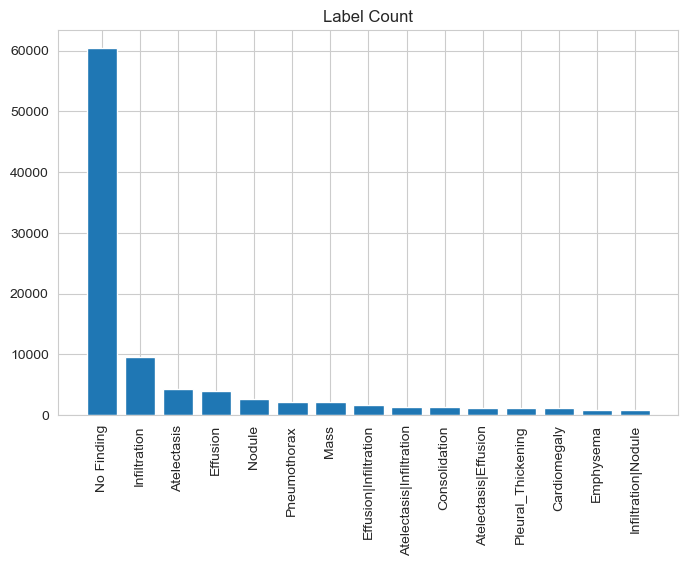

In [ ]:
label_counts = df['Finding Labels'].value_counts()[:15]

fig, ax = plt.subplots(1,1,figsize = (8, 5))

ax.bar(np.arange(len(label_counts))+0.5, label_counts)

ax.set_xticks(np.arange(len(label_counts))+0.5)

ax.set_title('Label Count')

_ = ax.set_xticklabels(label_counts.index, rotation = 90)

##### Observation

> <p align = 'justify'> We can observe that 'No Findings' has dominated the distribution with 60,000 entries. On the other hand, there are multi-labels that are low in frequency which are dominated by single labels. To simplify, we set the column 'Label Counts'.

#### Gender Distribution

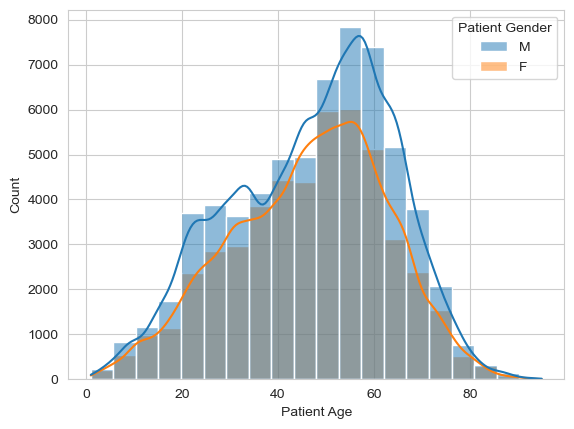

In [ ]:
sns.histplot(df, x='Patient Age', hue='Patient Gender', kde=True, multiple='layer', bins=20)
plt.show()

##### Observation

> <p align = 'justify'> The graph shows little sign of skewness to the left but within tolerable range.

#### Disease per Age

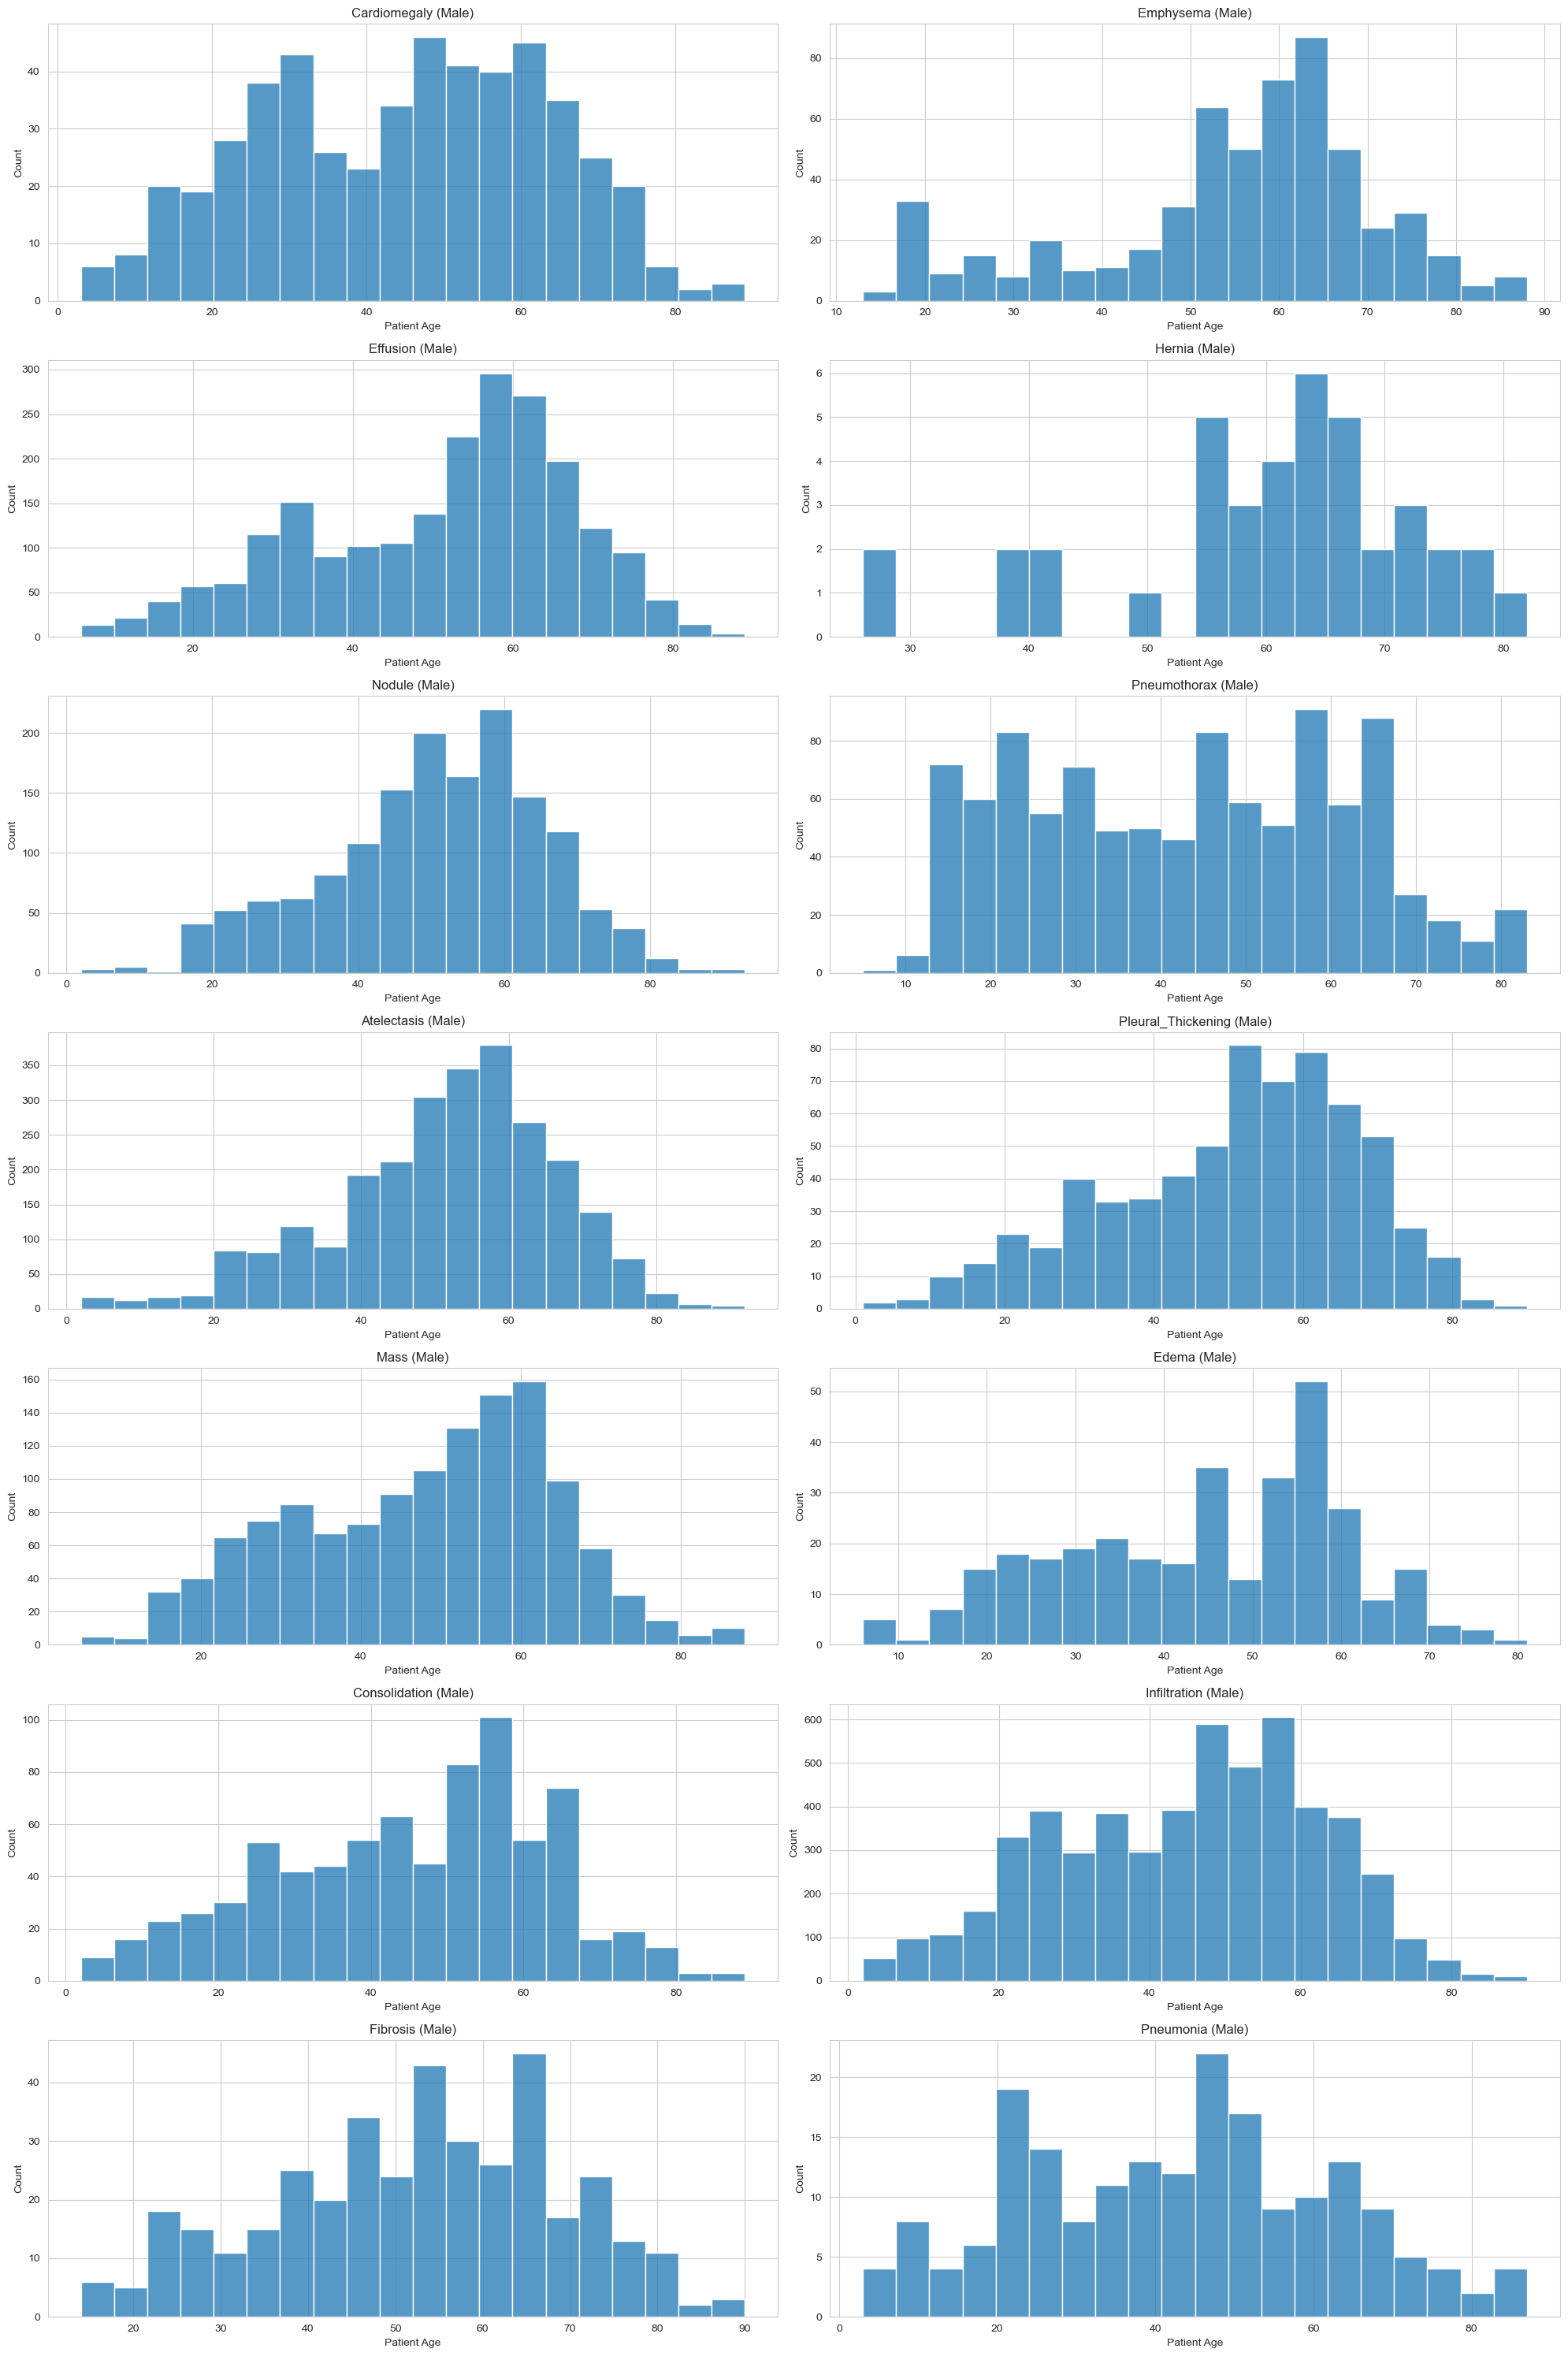

In [ ]:
male_data = df[df['Patient Gender'] == 'M']
pathology_list = ['Cardiomegaly', 'Emphysema', 'Effusion', 'Hernia', 'Nodule', 'Pneumothorax', 'Atelectasis', 'Pleural_Thickening', 'Mass', 'Edema', 'Consolidation', 'Infiltration', 'Fibrosis', 'Pneumonia']

fig, ax = plt.subplots(7, 2, figsize=(20, 30))

# Iterate over unique diseases
for i, disease in enumerate(pathology_list):
    # Filter data for the current disease
    male_disease_data = male_data[male_data['Finding Labels'] == disease]

    # Determine subplot position
    row_i = i // 2
    col_i = i % 2

    # Plot histogram of patient ages for the current disease
    sns.histplot(data = male_disease_data, x = 'Patient Age', ax = ax[row_i, col_i], bins=20)
    ax[row_i, col_i].set_title(f'{disease} (Male)')
    ax[row_i, col_i].set_xlabel('Patient Age')
    ax[row_i, col_i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


##### Observation

> <p align = 'justify'> Every unique diseases has a normal to a little left-skewed distribution about male having them which are mostly around 40-70 years old which are understandable especially on certain diseases. Also, it shows that every disease doesn't contain same number of patients.

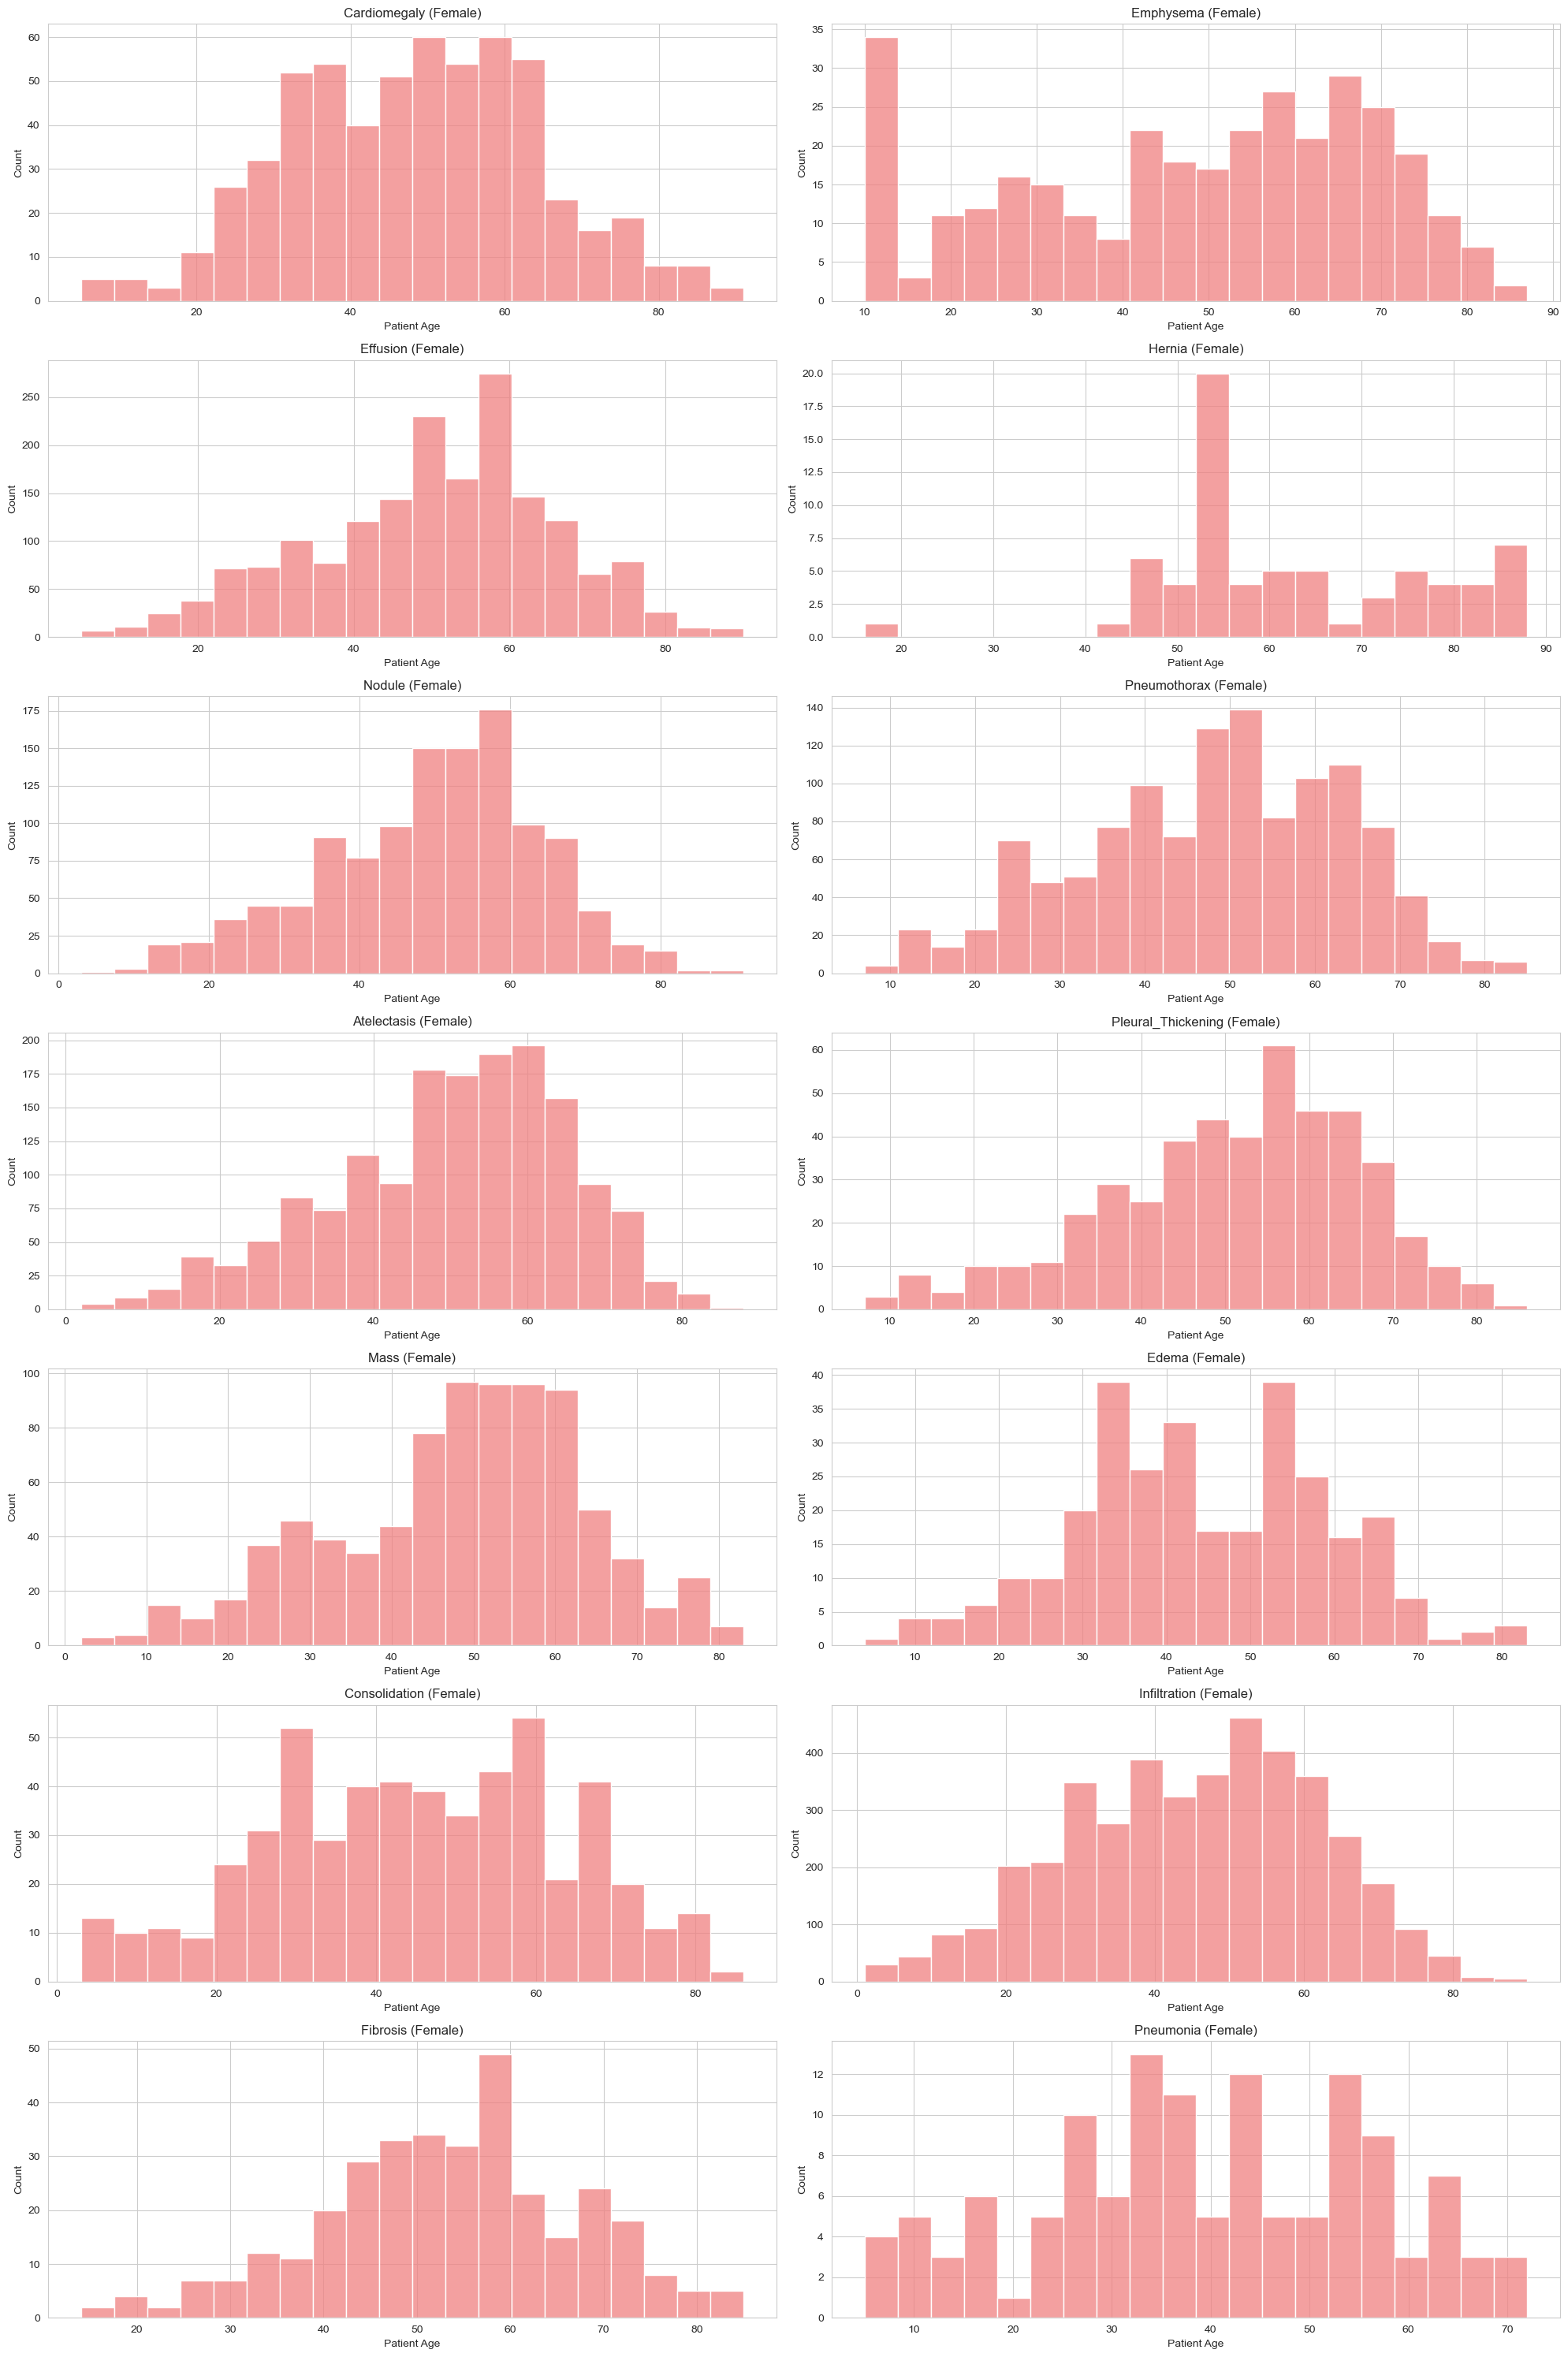

In [ ]:
female_data = df[df['Patient Gender'] == 'F']
fig, ax = plt.subplots(7, 2, figsize=(20, 30))

for i, disease in enumerate(pathology_list):
    # Filter data for the current disease
    female_disease_data = female_data[female_data['Finding Labels'] == disease]

    # Determine subplot position
    row_i = i // 2
    col_i = i % 2

    # Plot histogram of patient ages for the current disease
    sns.histplot(data = female_disease_data, x = 'Patient Age', ax = ax[row_i, col_i], bins=20, color = 'lightcoral')
    ax[row_i, col_i].set_title(f'{disease} (Female)')
    ax[row_i, col_i].set_xlabel('Patient Age')
    ax[row_i, col_i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

##### Observation

> <p align = 'justify'> It has the same behavior on male disease data having a normal and/or little left-skewed distribution on corresponding diseases. Also, it shows that every disease doesn't contain same number of patients.

#### Disease Count per Gender

In [ ]:
for pathology in pathology_list :
    df[pathology] = df['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)

df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Labels_Count,Cardiomegaly,Emphysema,Effusion,...,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
0,00000001_000.png,Cardiomegaly,0,1,58,M,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,81,M,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> <p align = 'justify'> Given the the target columns contains multiple diseases within a single entry, the model may label it only as a multi-class classification which will result on classifying whether a patient has single disease or a specific combiantion of disease. Therefore, we encode the targets like in one-hot in order to calculate the probability of having multiple diseases.

Text(0.5, 1.0, 'Disease per Gender')

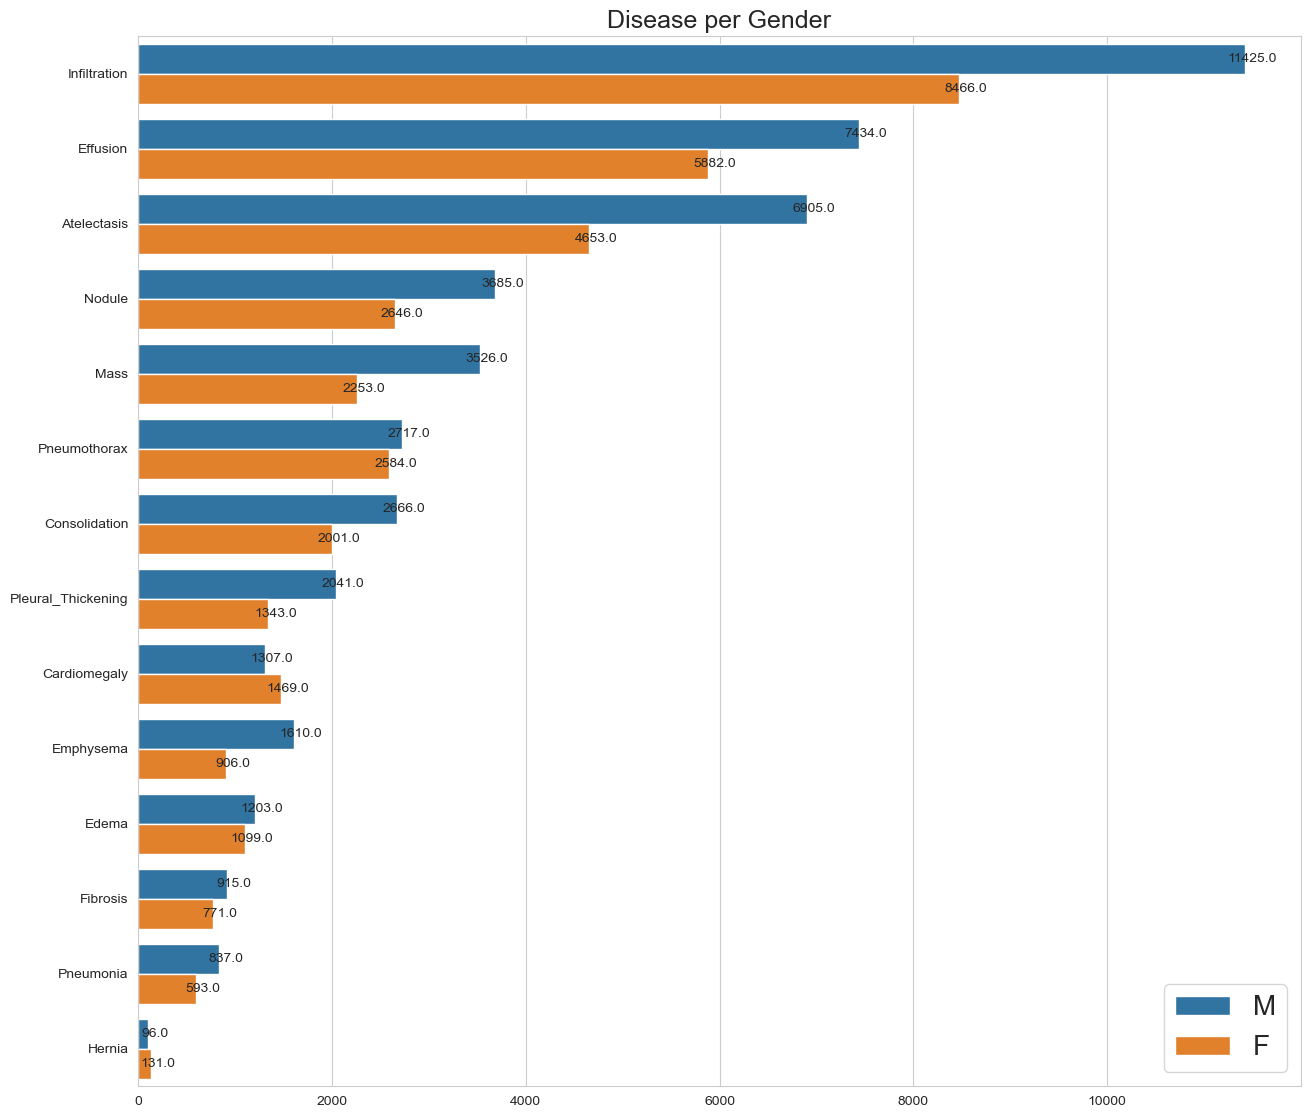

In [ ]:
plt.figure(figsize=(15,30))
ax = plt.subplot(2, 1, 1)

df_per_gen = df[df['Finding Labels'] != 'No Finding']

df_per_gen = pd.melt(df_per_gen, id_vars = ['Patient Gender'], value_vars = pathology_list, var_name = 'Category', value_name = 'Count')
df_per_gen = df_per_gen.loc[df_per_gen.Count > 0]

sns.countplot(y = 'Category', hue = 'Patient Gender', data = df_per_gen, ax = ax, order = df_per_gen['Category'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='center', va='center', xytext=(5, 0), textcoords='offset points')

ax.set(ylabel = "", xlabel = "")
ax.legend(fontsize = 20)
ax.set_title('Disease per Gender', fontsize = 18)

> <p align = 'justify'> In this figure, it shows the distribution of unique diseases infected grouped by gender. This figure considered the probability within the multi-labeled targets which we can observe an imbalance within the infiltration, effusion, and atelectasis compared to the rest of the diseases especially the hernia.

Text(0.5, 1.0, 'No Findings per Gender')

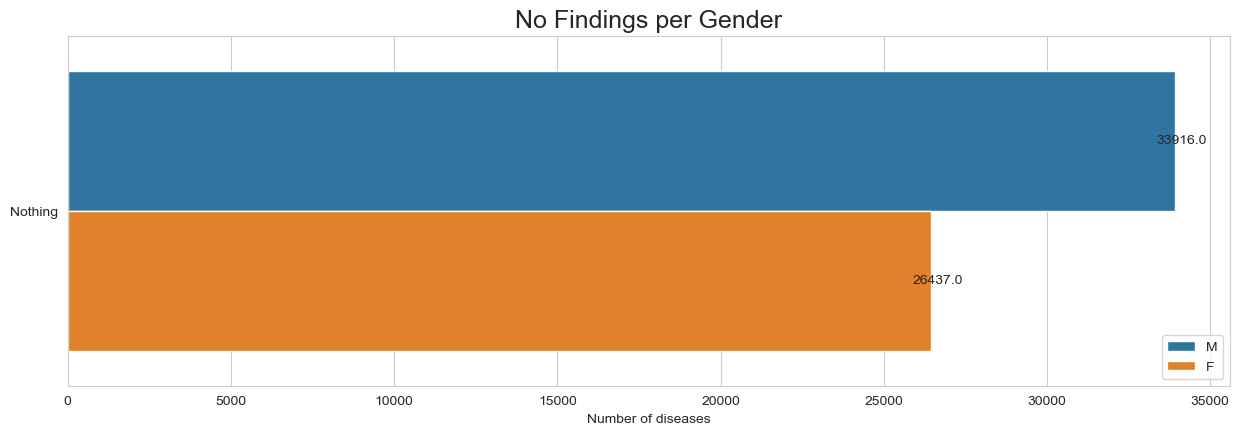

In [ ]:
plt.figure(figsize=(15,10))
ax = plt.subplot(2, 1, 1)

df['Nothing'] = df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)

non_per_gen = pd.melt(df, id_vars = ['Patient Gender'], value_vars = ['Nothing'], var_name = 'Category', value_name = 'Count')
non_per_gen = non_per_gen.loc[non_per_gen.Count > 0]

sns.countplot(y = 'Category', hue = 'Patient Gender', data = non_per_gen, ax = ax)
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='center', va='center', xytext=(5, 0), textcoords='offset points')

ax.set(ylabel = "", xlabel = "Number of diseases")
ax.legend()
ax.set_title('No Findings per Gender', fontsize = 18)

> <p align = 'justify'> This figure shows the frequency of every gender being diagnosed with no findings on their x-rays.

## Passing Image Data per Entry

In [ ]:
img_path = {os.path.basename(x): x for x in
            glob(os.path.join(R'D:\vrsp11603\Schoolworks\DS3\Prelims',  'images_*', 'images*', '*.png'))}

print('Scans found:', len(img_path), ', Total Headers', df.shape[0])
df['path'] = df['Image Index'].map(img_path.get)

df.sample(3)

Scans found: 112120 , Total Headers 112104


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Labels_Count,Cardiomegaly,Emphysema,Effusion,...,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,Nothing,path
28190,00007343_002.png,No Finding,2,7343,25,M,0,0,0,0,...,0,0,0,0,0,0,0,0,1,D:\vrsp11603\Schoolworks\DS3\Prelims\images_00...
89801,00022298_000.png,No Finding,0,22298,45,F,0,0,0,0,...,0,0,0,0,0,0,0,0,1,D:\vrsp11603\Schoolworks\DS3\Prelims\images_01...
101385,00026933_000.png,No Finding,0,26933,58,F,0,0,0,0,...,0,0,0,0,0,0,0,0,1,D:\vrsp11603\Schoolworks\DS3\Prelims\images_01...


> <p align = 'justify'>The image data is imported via glob, a pathname pattern matching, via the directory specified within the concatenation of os.path.join. Therefore, after the main directory, the glob searches for directories matches the first keywork, images_, and the wildcard symbol wil do the rest which are applied on the next directories and into the image filenames.

In [ ]:
# Remove 'No Finding' from 'Finding Labels'
df['Finding Labels'] = df['Finding Labels'].str.replace('No Finding', '')

# Extract unique labels
all_labels = np.unique(df['Finding Labels'].str.split('|').explode())

# Filter out empty labels
all_labels = [label for label in all_labels if label]

# Create binary columns for each label
for label in all_labels:
    if len(label) > 1:  # Skip empty labels
        df[label] = df['Finding Labels'].str.contains(label).astype(float)

# Sample 3 rows
sampled_data = df.sample(3)
sampled_data

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Labels_Count,Cardiomegaly,Emphysema,Effusion,...,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,Nothing,path
78414,00019242_001.png,,1,19242,29,M,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,D:\vrsp11603\Schoolworks\DS3\Prelims\images_00...
23240,00006153_001.png,Hernia,1,6153,55,F,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,D:\vrsp11603\Schoolworks\DS3\Prelims\images_00...
101279,00026904_004.png,,4,26904,79,M,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,D:\vrsp11603\Schoolworks\DS3\Prelims\images_01...


In [ ]:
all_labels = [c_label for c_label in all_labels if df[c_label].sum() > 1000]
print('Clean Labels ({})'.format(len(all_labels)),
      [(c_label,int(df[c_label].sum())) for c_label in all_labels])

Clean Labels (13) [('Atelectasis', 11558), ('Cardiomegaly', 2776), ('Consolidation', 4667), ('Edema', 2302), ('Effusion', 13316), ('Emphysema', 2516), ('Fibrosis', 1686), ('Infiltration', 19891), ('Mass', 5779), ('Nodule', 6331), ('Pleural_Thickening', 3384), ('Pneumonia', 1430), ('Pneumothorax', 5301)]


> <p align = 'justify'> We filter the labels which has more than 1000 samples as smaller frequency provides an outlier effect on the learning of model specifically HErnia.

In [ ]:
df['disease_vec'] = df.apply(lambda x: [x[all_labels].values], 1).map(lambda x: x[0])

> <p align = 'justify'> Disease_vec represents the mapping of occurence of multiple labels in one entry in an array form.

In [ ]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,Labels_Count,Cardiomegaly,Emphysema,Effusion,...,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,Nothing,path,disease_vec
0,00000001_000.png,Cardiomegaly,0,1,58,M,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,D:\vrsp11603\Schoolworks\DS3\Prelims\images_00...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,2,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,D:\vrsp11603\Schoolworks\DS3\Prelims\images_00...,"[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,2,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,D:\vrsp11603\Schoolworks\DS3\Prelims\images_00...,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
3,00000002_000.png,,0,2,81,M,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,D:\vrsp11603\Schoolworks\DS3\Prelims\images_00...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,00000003_000.png,Hernia,0,3,81,F,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,D:\vrsp11603\Schoolworks\DS3\Prelims\images_00...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


## Data Splitting

In [ ]:
train_df, test_df = train_test_split(df,
                                   test_size = 0.20,
                                   random_state = 2018,
                                   stratify = df['Finding Labels'].map(lambda x: x[:4]))

print('Train shape: ', train_df.shape[0], '\nTest shape: ', test_df.shape[0])

Train shape:  89683 
Test shape:  22421


In [ ]:
train_df, valid_df = train_test_split(train_df,
                                   test_size = 0.20,
                                   random_state = 2018,
                                   stratify = train_df['Finding Labels'].map(lambda x: x[:4]))

print('Train shape: ', train_df.shape[0], '\nValidation shape: ', valid_df.shape[0])

Train shape:  71746 
Validation shape:  17937


In [ ]:
valid_df['newLabel'] = valid_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)
train_df['newLabel'] = train_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)

In [ ]:
IMG_SIZE = (224, 224)
idg = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
    horizontal_flip = True,
    vertical_flip = False,
    height_shift_range= 0.05,
    width_shift_range=0.1,
    rotation_range=5,
    shear_range = 0.1,
    fill_mode = 'reflect',
    zoom_range=0.15
)

> <p align = 'justify'> We used the ImageDataGenerator in order to augment data from the images in order to produce variability for which the model can learn in different perspective and avoid overfitting. Every parameter is affecting the image such as flipping, shifting, rotation, samplewise centering and normalization, and also the fill_mode that may generate close data images or a wrapped image for more learning aspects.

In [ ]:
train_gen = idg.flow_from_dataframe(
    dataframe = train_df,
    directory = None,
    x_col = 'path',
    y_col = 'newLabel',
    class_mode = 'categorical',
    classes = all_labels,
    target_size = IMG_SIZE,
    color_mode = 'grayscale',
    batch_size = 32)

valid_gen = idg.flow_from_dataframe(
    dataframe = valid_df,
    directory = None,
    x_col = 'path',
    y_col = 'newLabel',
    class_mode = 'categorical',
    classes = all_labels,
    target_size = IMG_SIZE,
    color_mode = 'grayscale',
    batch_size = 256)

x_test, y_test = next(idg.flow_from_dataframe(
    dataframe = valid_df,
    directory = None,
    x_col = 'path',
    y_col = 'newLabel',
    class_mode = 'categorical',
    classes = all_labels,
    target_size = IMG_SIZE,
    color_mode = 'grayscale',
    batch_size = 1024))

Found 33051 validated image filenames belonging to 13 classes.
Found 8261 validated image filenames belonging to 13 classes.
Found 8261 validated image filenames belonging to 13 classes.


> <p align = 'justify'> Flow_from_dataframe generates images for training from the dataframe which is specified by the dataframe parameter, x_col, and y_col. We can also modify the type of images to be processed such as the target_size for resizing the image data and its color_mode from grayscale to rgb. Class_mode is a necessary parameter as it defines the type of labels to be returned for every entry such as binary for one of the two classes, sparse for integers, and categorical for one-hot encoded which is a similar approach for multilabel classification.

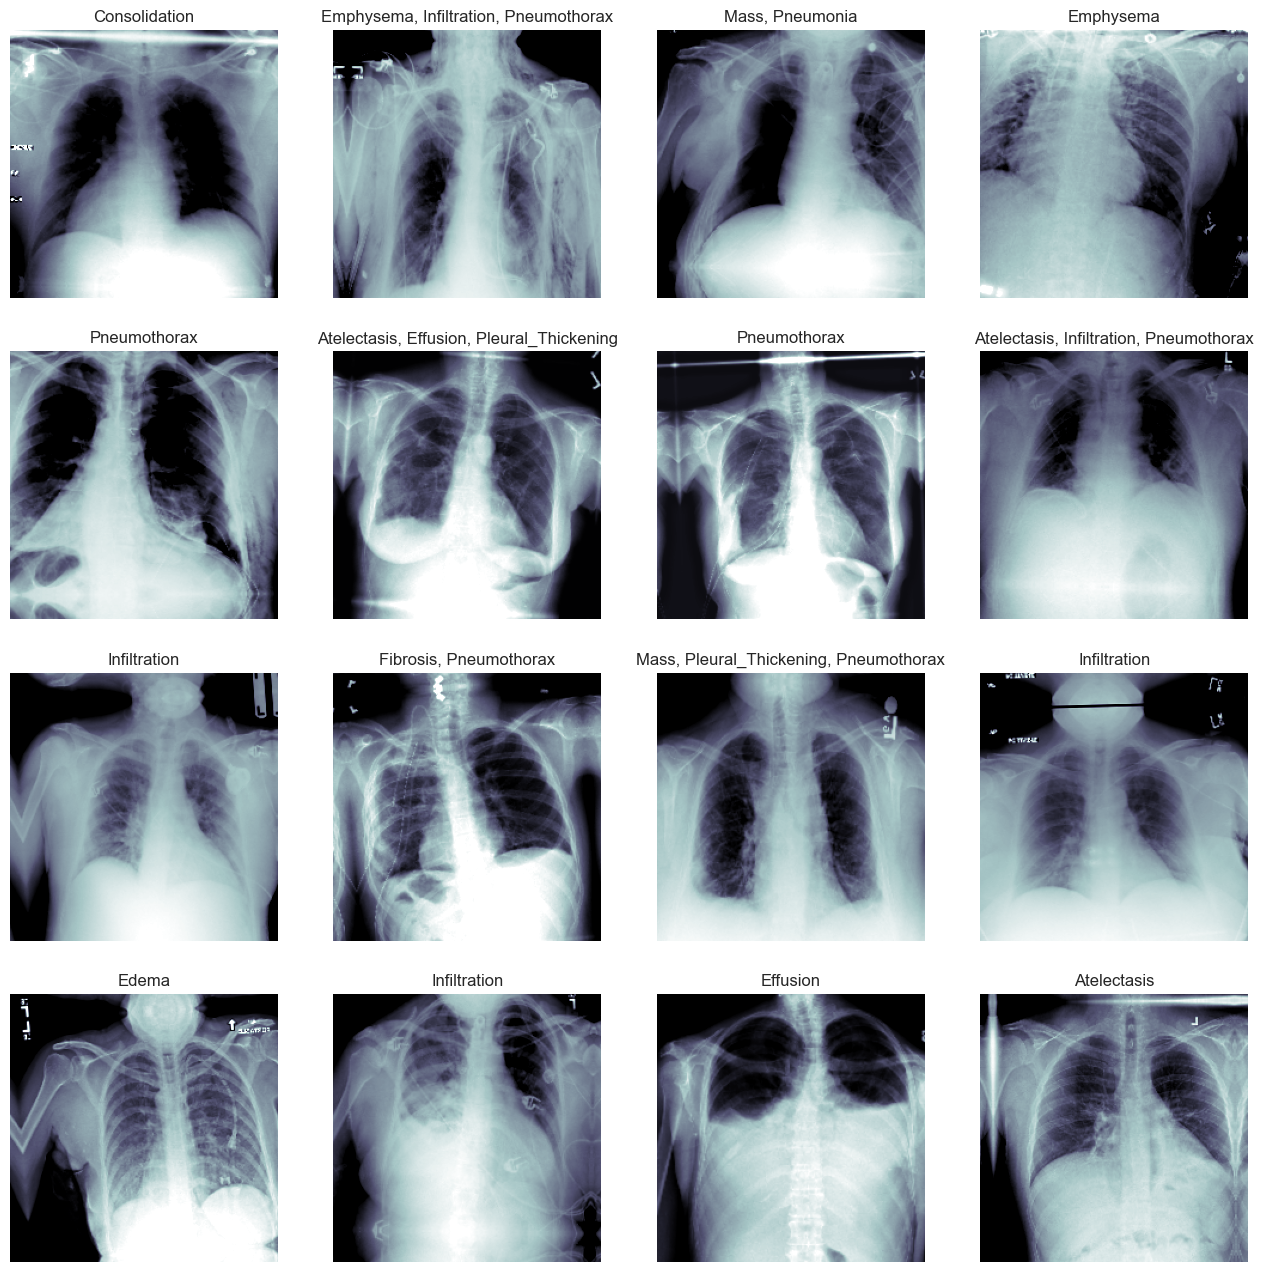

In [ ]:
x_train, y_train = next(train_gen)

fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for (c_x, c_y, c_ax) in zip(x_train, y_train, m_axs.flatten()):
    c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -1.5, vmax = 1.5)
    c_ax.set_title(', '.join([n_class for n_class, n_score in zip(all_labels, c_y) if n_score > 0.5]))
    c_ax.axis('off')

## CNN Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), (2, 2), activation = 'relu', input_shape = x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), (2, 2), activation = 'relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), (2, 2), activation = 'relu'))
model.add(Conv2D(64, (3, 3), (2, 2), activation = 'relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(len(all_labels), activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 111, 111, 32)      320       
                                                                 
 conv2d_5 (Conv2D)           (None, 55, 55, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 27, 27, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 6, 6, 64)          36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 3, 3, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy', 'mae', 'accuracy']
)

start = now()

hist_1 = model.fit(train_gen, epochs = 5, validation_data = valid_gen, verbose = 1)

print('Total Time: ', start - now())

Time:  2024-03-17 14:31:50.655631
Epoch 1/5
1033/1033 [==============================] - 3229s 3s/step - loss: 0.3250 - binary_accuracy: 0.8785 - mae: 0.1919 - accuracy: 0.2418 - val_loss: 0.3168 - val_binary_accuracy: 0.8794 - val_mae: 0.1811 - val_accuracy: 0.2490
Epoch 2/5
1033/1033 [==============================] - 3139s 3s/step - loss: 0.3168 - binary_accuracy: 0.8796 - mae: 0.1875 - accuracy: 0.2622 - val_loss: 0.3143 - val_binary_accuracy: 0.8802 - val_mae: 0.1903 - val_accuracy: 0.2570
Epoch 3/5
1033/1033 [==============================] - 2786s 3s/step - loss: 0.3142 - binary_accuracy: 0.8800 - mae: 0.1860 - accuracy: 0.2733 - val_loss: 0.3116 - val_binary_accuracy: 0.8809 - val_mae: 0.1825 - val_accuracy: 0.2743
Epoch 4/5
1033/1033 [==============================] - 2462s 2s/step - loss: 0.3121 - binary_accuracy: 0.8803 - mae: 0.1848 - accuracy: 0.2826 - val_loss: 0.3114 - val_binary_accuracy: 0.8802 - val_mae: 0.1907 - val_accuracy: 0.2860
Epoch 5/5
1033/1033 [=============

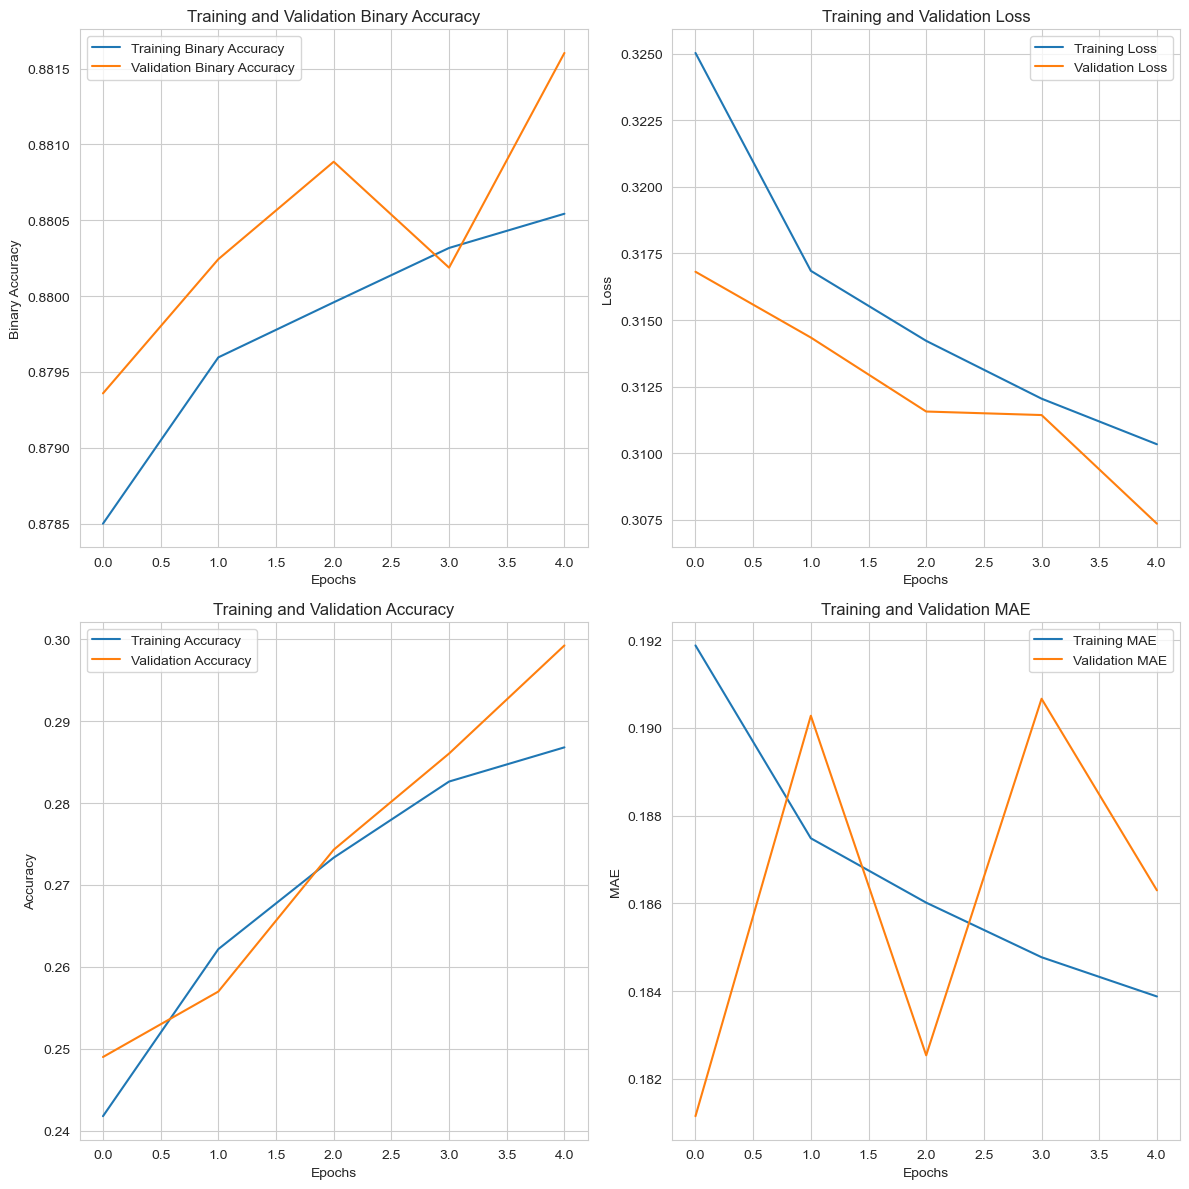

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.plot(hist_1.history['binary_accuracy'], label='Training Binary Accuracy')
plt.plot(hist_1.history['val_binary_accuracy'], label='Validation Binary Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Binary Accuracy')
plt.title('Training and Validation Binary Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(hist_1.history['loss'], label='Training Loss')
plt.plot(hist_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(hist_1.history['accuracy'], label='Training Accuracy')
plt.plot(hist_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(hist_1.history['mae'], label='Training MAE')
plt.plot(hist_1.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
score_1 = model.evaluate(train_gen, verbose=1)
print('Train loss:', score_1[0])
print('Train accuracy:', score_1[1])

1033/1033 [==============================] - 2389s 2s/step - loss: 0.3073 - binary_accuracy: 0.8812 - mae: 0.1861 - accuracy: 0.3064
Train loss: 0.3072604238986969
Train accuracy: 0.8812416195869446


In [ ]:
print('Training Loss: ', score_1[0])
print('Training Binary Accuracy: ', score_1[1])
print('Training MAE: ', score_1[2])
print('Training Accuracy: ', score_1[3])

Training Loss:  0.3072604238986969
Training Binary Accuracy:  0.8812416195869446
Training MAE:  0.1861323118209839
Training Accuracy:  0.3064354956150055


> <p align = 'justify'> In this figure, we can observe the four metrics used in model fitting: binary_accuracy, loss, accuracy, and mean absolute error. Loss shows good trend of value which are small amounts and refers to the discrepancy of the prediction of the model to the actual value which is 0.31 on average. This shows that there are more to be desired on the model and were able to learn to decrease the incorrectness of the prediction to the actual value.

> <p align = 'justify'> Binary accuracy is used for binary classification of every unique disease in every entry. From the graph, the model achieved a decent value of around 88% which denotes the accuracy of the model to classify whether the x-ray image shows signs of Cardiomegaly or not, Emphysema or not, and other more one by one.

> <p align = 'justify'> Mean error absolute refers to the difference of the model to predict the probability of the a unique disease to be present base on the data. It reached a 0.186 value which denotes that the model is 0.186 far from the actual results which I think is a good sign.

> <p align = 'justify'> Accuracy refers to the whole case prediction of the model which only reached around 29% which doesn't show a good premise. This only presents that the accuracy of a prediction with its final verdict has only 30% chance of being correct.

In [ ]:
for disease_label, disease_count in zip(all_labels, 100*np.mean(y_test, 0)):
    print('%s: %2.2f%%' % (disease_label, disease_count))

Atelectasis: 23.44%
Cardiomegaly: 6.15%
Consolidation: 9.28%
Edema: 3.52%
Effusion: 24.22%
Emphysema: 4.88%
Fibrosis: 2.54%
Infiltration: 40.14%
Mass: 12.60%
Nodule: 12.40%
Pleural_Thickening: 5.37%
Pneumonia: 2.73%
Pneumothorax: 10.84%


> <p align = 'justify'> This shows distribution of the unique diseases on the y_test which can be observed that are dominated by Atelectasis, Effusion, and Infiltration and creates and imbalance to the other diseases.

In [ ]:
y_pred_prob = model.predict(x_test, batch_size = 32, verbose = 1)

32/32 [==============================] - 1s 26ms/step


In [ ]:
print(y_pred_prob[0])

[0.08935792 0.14421141 0.03427761 0.0188465  0.02266745 0.02223679
 0.0175991  0.59645    0.06088156 0.14266124 0.02491412 0.02487327
 0.05069601]


In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(model.predict(x_test), axis=1).astype('int64')

32/32 [==============================] - 1s 27ms/step


In [ ]:
y_test_class

array([7, 3, 7, ..., 0, 7, 0], dtype=int64)

In [ ]:
y_pred_class[:10]

array([7, 7, 7, 0, 7, 7, 7, 7, 4, 0], dtype=int64)

In [ ]:
print(classification_report(y_test_class, y_pred_class, target_names = all_labels))

                    precision    recall  f1-score   support

       Atelectasis       0.46      0.36      0.40       240
      Cardiomegaly       0.00      0.00      0.00        52
     Consolidation       0.00      0.00      0.00        63
             Edema       0.00      0.00      0.00        29
          Effusion       0.31      0.32      0.31       145
         Emphysema       0.00      0.00      0.00        35
          Fibrosis       0.00      0.00      0.00        20
      Infiltration       0.31      0.83      0.45       258
              Mass       0.00      0.00      0.00        66
            Nodule       0.00      0.00      0.00        56
Pleural_Thickening       0.00      0.00      0.00        13
         Pneumonia       0.00      0.00      0.00         6
      Pneumothorax       0.50      0.02      0.05        41

          accuracy                           0.34      1024
         macro avg       0.12      0.12      0.09      1024
      weighted avg       0.25      0.3

> <p align = 'justify'> The classification report shows a summarized information about the classification of the model which at best onyl shows 34% of accuracy. Cardiomegaly, Consolidation, Edema, Emphysema, Fibroses, Mass, Nodele, Pleural Thickening, and Pneunomia don't show signs of being predicted resulted to 0 precision and recall. And we can also assume that the number of support also plays a part compared to Atelectasis, Effusion, and Infiltration that has 100+ support data..

In [ ]:
print(multilabel_confusion_matrix(y_test_class, y_pred_class))

[[[ 683  101]
  [ 154   86]]

 [[ 972    0]
  [  52    0]]

 [[ 961    0]
  [  63    0]]

 [[ 995    0]
  [  29    0]]

 [[ 777  102]
  [  99   46]]

 [[ 989    0]
  [  35    0]]

 [[1004    0]
  [  20    0]]

 [[ 293  473]
  [  44  214]]

 [[ 958    0]
  [  66    0]]

 [[ 968    0]
  [  56    0]]

 [[1011    0]
  [  13    0]]

 [[1018    0]
  [   6    0]]

 [[ 982    1]
  [  40    1]]]


> <p align = 'justify'> In this multilabel confusion matrix, we can breakdown the classification occured on every labels. For Cardiomegaly, Consolidation, Edema, Emphysema, Fibroses, Mass, Nodele, Pleural Thickening, and Pneunomia, the model wasn't able to predict true positives or even false positive of it that resulted to 0% of precision which measured the correctness of the prediction and 0% of recall which measures the ratio of the predicted values to the actual values. On the other hand, the remaining labels was managed to be predicted by the model that there are correct true positives which puts a value on the precision and recall.

In [ ]:
def get_conf(y_tes, y_pred, label_name, title='Confusion Matrix'):
    conf_m = confusion_matrix(y_tes, y_pred)
    labels = label_name
    plt.figure(figsize = (6, 6))
    sns.set(font_scale = 1.2)
    sns.heatmap(conf_m, annot = True, fmt = 'd', cmap = 'Pastel1', linewidths = .5, cbar = False,
    square = True, xticklabels = labels, yticklabels = labels)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    return conf_m

array([[ 86,   0,   0,   0,  37,   0,   0, 117,   0,   0,   0,   0,   0],
       [  8,   0,   0,   0,   8,   0,   0,  36,   0,   0,   0,   0,   0],
       [  8,   0,   0,   0,   9,   0,   0,  46,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,  28,   0,   0,   0,   0,   0],
       [ 23,   0,   0,   0,  46,   0,   0,  76,   0,   0,   0,   0,   0],
       [  6,   0,   0,   0,   2,   0,   0,  27,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   1,   0,   0,  16,   0,   0,   0,   0,   1],
       [ 31,   0,   0,   0,  13,   0,   0, 214,   0,   0,   0,   0,   0],
       [  9,   0,   0,   0,  15,   0,   0,  42,   0,   0,   0,   0,   0],
       [  5,   0,   0,   0,   8,   0,   0,  43,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   3,   0,   0,   8,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   6,   0,   0,   0,   0,   0],
       [  6,   0,   0,   0,   6,   0,   0,  28,   0,   0,   0,   0,   1]],
      dtype=int64)

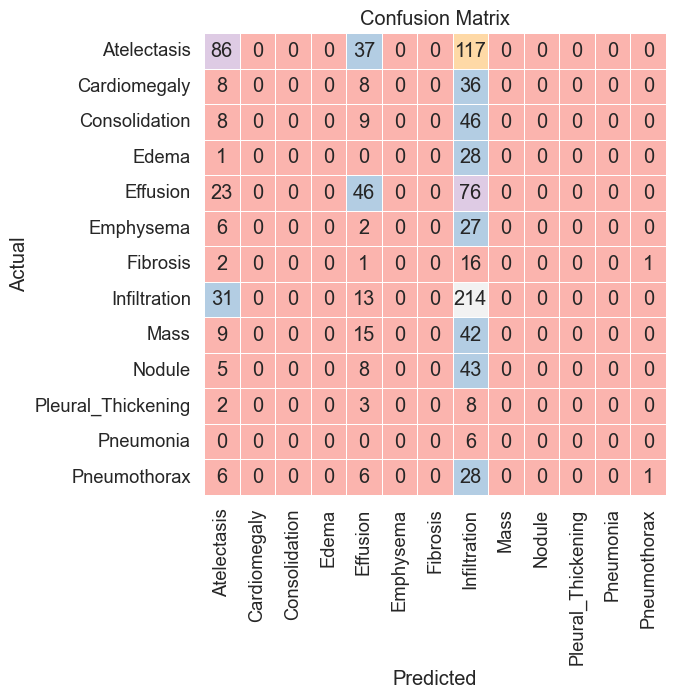

In [ ]:
get_conf(y_test_class, y_pred_class, all_labels)

> <p align = 'justify'> This figure is a compressed confusion matrix where we can analyze the whole classification results such as 86 instance of accurate predictions of Atelectasis, 214 instances for Infiltration and such.

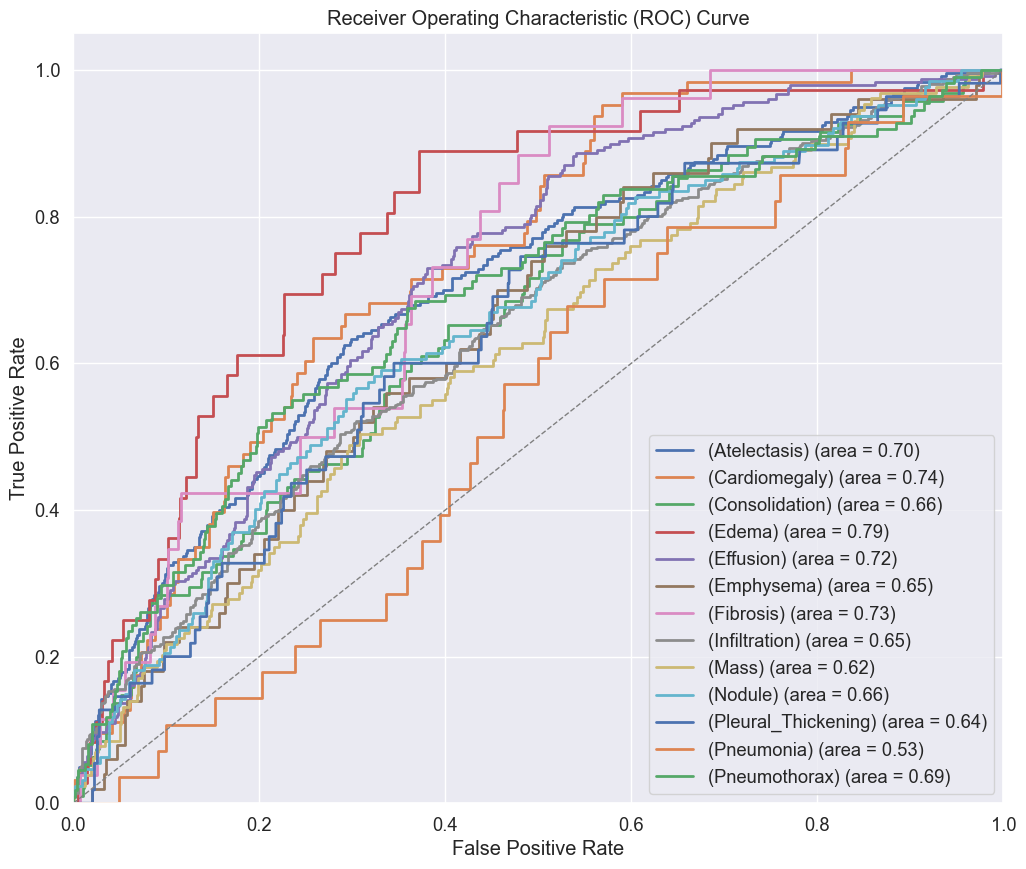

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(all_labels)):
    fpr[i], tpr[i], _ = roc_curve(test_Y[:, i], pred_Y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(12, 10))
for i in range(len(all_labels)):
    plt.plot(fpr[i], tpr[i], lw=2, label='({}) (area = {:.2f})'.format(all_labels[i], roc_auc[i]))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

> <p align = 'justify'> This figure displays the capability of the model to accurately predict the occurence of every diseases. Given that most area under curve are greate than 60%, it works a little better compared to random guesses. But the prediction on Atelectasis, Cardiomegaly, Edema, Effusion, and Fibrosis are a bit more reliable as they reached the 70% marked. However, that is not the case on the Pneunomia which works around random guesses.

# Model 2

In [ ]:
model2 = Sequential()

# try 3x3 size of kernel filter
model2.add(Conv2D(32, (2, 2), (1, 1), activation = 'relu', input_shape = x_train.shape[1:]))
model2.add(Conv2D(32, (2, 2), (1, 1), activation = 'relu'))
model2.add(MaxPooling2D(2, 2))

model2.add(Conv2D(64, (2, 2), (1, 1), activation = 'relu'))
model2.add(Conv2D(64, (2, 2), (1, 1), activation = 'relu'))
model2.add(MaxPooling2D(2, 2))

model2.add(Conv2D(128, (2, 2), (1, 1), activation = 'relu'))
model2.add(Conv2D(128, (2, 2), (1, 1), activation = 'relu'))
model2.add(MaxPooling2D(2, 2))

model2.add(Flatten())
model2.add(Dense(512, activation = 'relu'))
model2.add(Dropout(0.25))
model2.add(Dense(len(all_labels), activation = 'sigmoid'))
# Num of labels
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 223, 223, 32)      160       
                                                                 
 conv2d_43 (Conv2D)          (None, 222, 222, 32)      4128      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 110, 110, 64)      8256      
                                                                 
 conv2d_45 (Conv2D)          (None, 109, 109, 64)      16448     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                

## Pre-trained Model

In [ ]:
model.layers[:6]

In [ ]:
inceptionv3_model = inception_v3.InceptionV3(input_shape = x_train.shape[1:],
                                             include_top = False,
                                             weights = None,
                                             pooling = 'max')

inceptionv3_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 1)]        0         []                            
                                                                                                  
 conv2d_104 (Conv2D)         (None, 111, 111, 32)         288       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_104[0][0]']          
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalizati

In [ ]:
for layer in model.layers[:6]:
    layer.trainable = False

In [ ]:
model3 = Sequential()

model3.add(inceptionv3_model)

model3.add(Flatten())
model3.add(Dense(512, activation = 'relu'))
model3.add(Dropout(0.25))
model3.add(Dense(1, activation = 'sigmoid'))

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802208  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                                 
Total params: 22851809 (87.17 MB)
Trainable params: 22817377 (87.04 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________


In [ ]:
model3.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.005),
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy', 'mae']
)

start = now()
print('Time: ', now())
hist_3 = model3.fit_generator(train_gen, epochs = 5, validation_data = valid_gen, verbose = 1)
print('Time: ', now())
print('Total Time: ', start - now())

Time:  2024-03-15 15:24:06.453949
Epoch 1/5
1162/1162 [==============================] - ETA: 0s - loss: 0.4729 - binary_accuracy: 0.8779 - mae: 0.2145

In [ ]:
inceptionv3_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                           metrics = ['accuracy'])


history = inceptionv3_model.fit_generator(train_gen,
                                  steps_per_epoch=100,
                                  validation_data = valid_gen,
                                  epochs = 30)


Epoch 1/30


InvalidArgumentError: Graph execution error:

Detected at node gradient_tape/categorical_crossentropy/mul/BroadcastGradientArgs defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Users\User\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "c:\Users\User\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "c:\Users\User\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "c:\Users\User\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Users\User\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "c:\Users\User\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "c:\Users\User\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "c:\Users\User\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "c:\Users\User\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "c:\Users\User\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "c:\Users\User\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "c:\Users\User\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "c:\Users\User\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "c:\Users\User\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "c:\Users\User\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "c:\Users\User\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\Users\User\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "c:\Users\User\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "c:\Users\User\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\User\AppData\Local\Temp\ipykernel_19824\3947222959.py", line 5, in <module>

  File "c:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2913, in fit_generator

  File "c:\Users\User\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "c:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "c:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "c:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "c:\Users\User\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1154, in train_step

  File "c:\Users\User\anaconda3\Lib\site-packages\keras\src\optimizers\optimizer.py", line 543, in minimize

  File "c:\Users\User\anaconda3\Lib\site-packages\keras\src\optimizers\optimizer.py", line 276, in compute_gradients

Incompatible shapes: [32,13] vs. [32,2048]
	 [[{{node gradient_tape/categorical_crossentropy/mul/BroadcastGradientArgs}}]] [Op:__inference_train_function_53403]

### Freezing

In [ ]:
molde

In [ ]:
model2 = Sequential()

model2.add(Conv2D(32, (2, 2), (1, 1), activation = 'relu', input_shape = x_train.shape[1:], trainable = False))
model2.add(Conv2D(32, (2, 2), (1, 1), activation = 'relu', trainable = False))
model2.add(MaxPooling2D(2, 2))

model2.add(Conv2D(64, (2, 2), (1, 1), activation = 'relu', trainable = False))
model2.add(Conv2D(64, (2, 2), (1, 1), activation = 'relu', trainable = False))
model2.add(MaxPooling2D(2, 2))

model2.add(Flatten())
model2.add(Dense(512, activation = 'relu'))
model2.add(Dropout(0.25))
model2.add(Dense(1, activation = 'sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_100 (Conv2D)         (None, 223, 223, 32)      160       
                                                                 
 conv2d_101 (Conv2D)         (None, 222, 222, 32)      4128      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_102 (Conv2D)         (None, 110, 110, 64)      8256      
                                                                 
 conv2d_103 (Conv2D)         (None, 109, 109, 64)      16448     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                 

# Conclusion

> <p align = 'justify'> In this skills exam, I was able to facilitate a multi-label classification which also requires importing image data into dataframe and pre-processing similar to one-hot encoding. After that, performing the data generator will increase the data variability which presents the model a different perspective/image with the same labels. The metrics required to be considered is also different from the multi-class classification such as computing for mean absolute error for computing the probabilities of every label and also the difference between the binary_accuracy and accuracy. In this type of problem, binary_accuracy is used in order to check the accuracy of the model in terms of predicting only a label, whether positive or negative, where in accuracy metric refers to the overall classification result where a two-label model should be accurately predicted with the same two-label.